<h1>PROJECT 4: Dengue Cases</h1>

<h2>Analyst: Anne Fedelino</h2>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
dengue = pd.read_csv('datasets/dengue.csv')

In [23]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

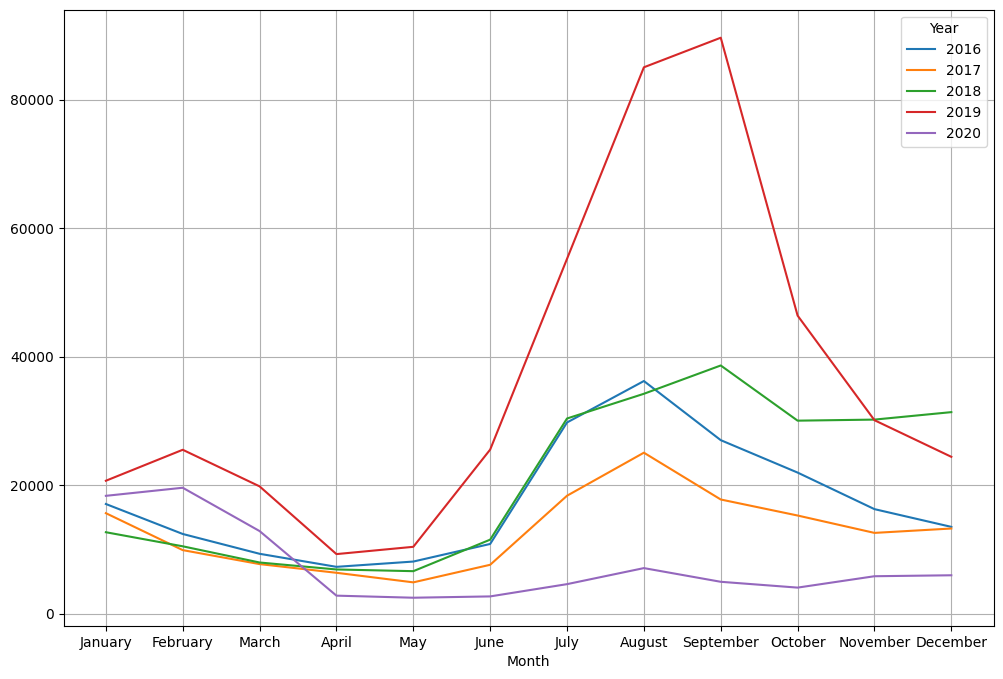

In [8]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


In [9]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1> LINE PLOT WITH SEABORN </h1>

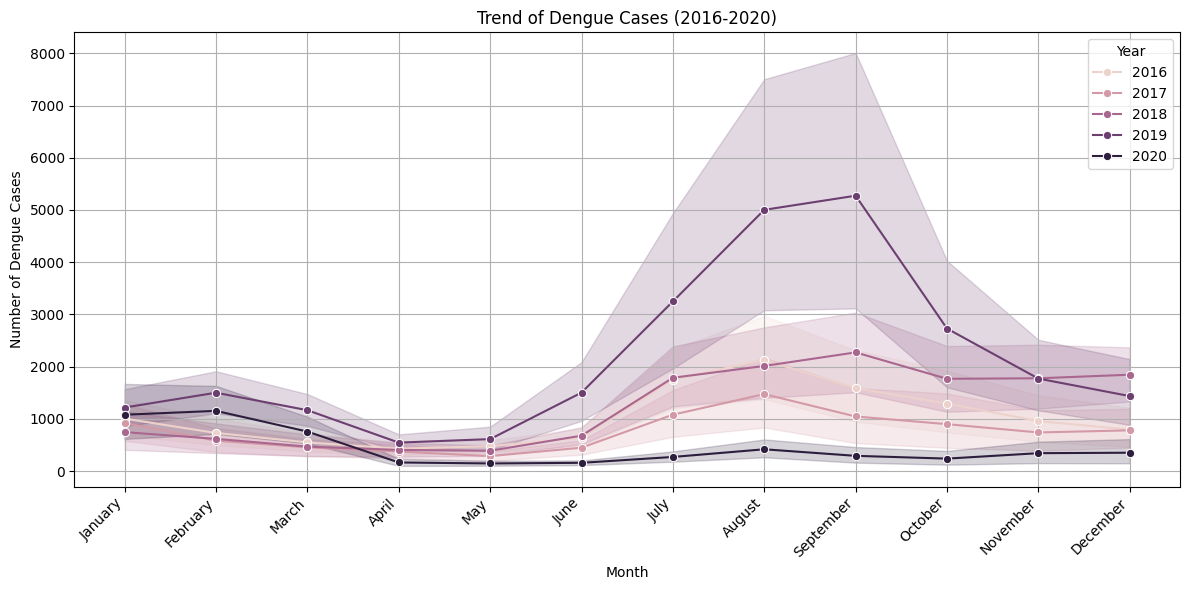

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

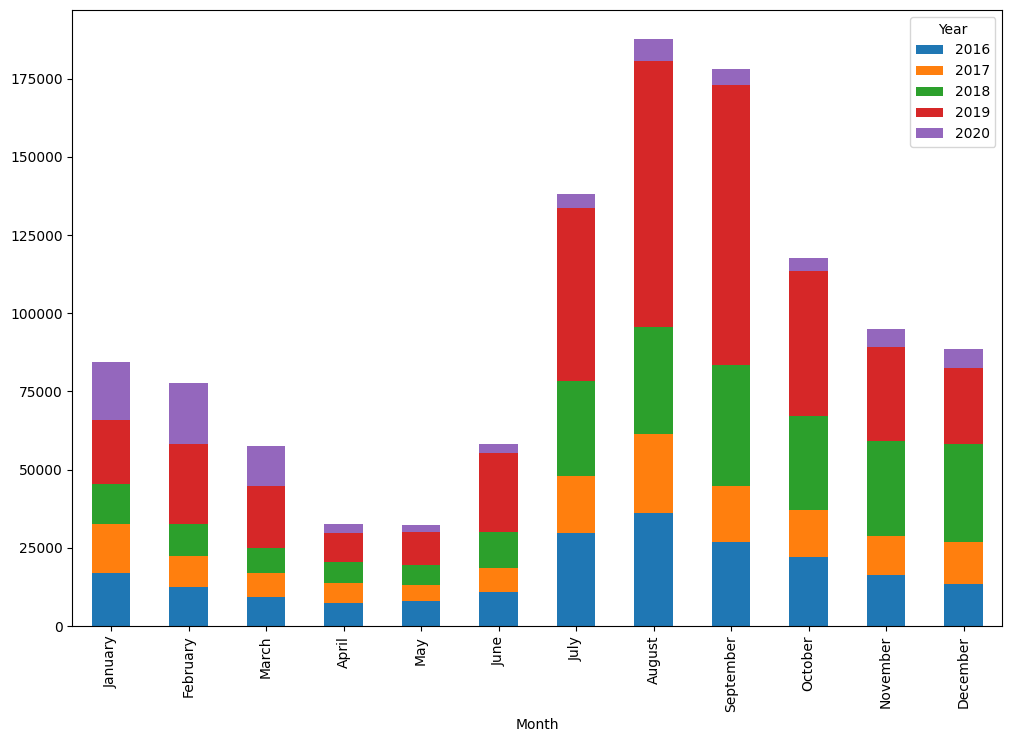

In [11]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

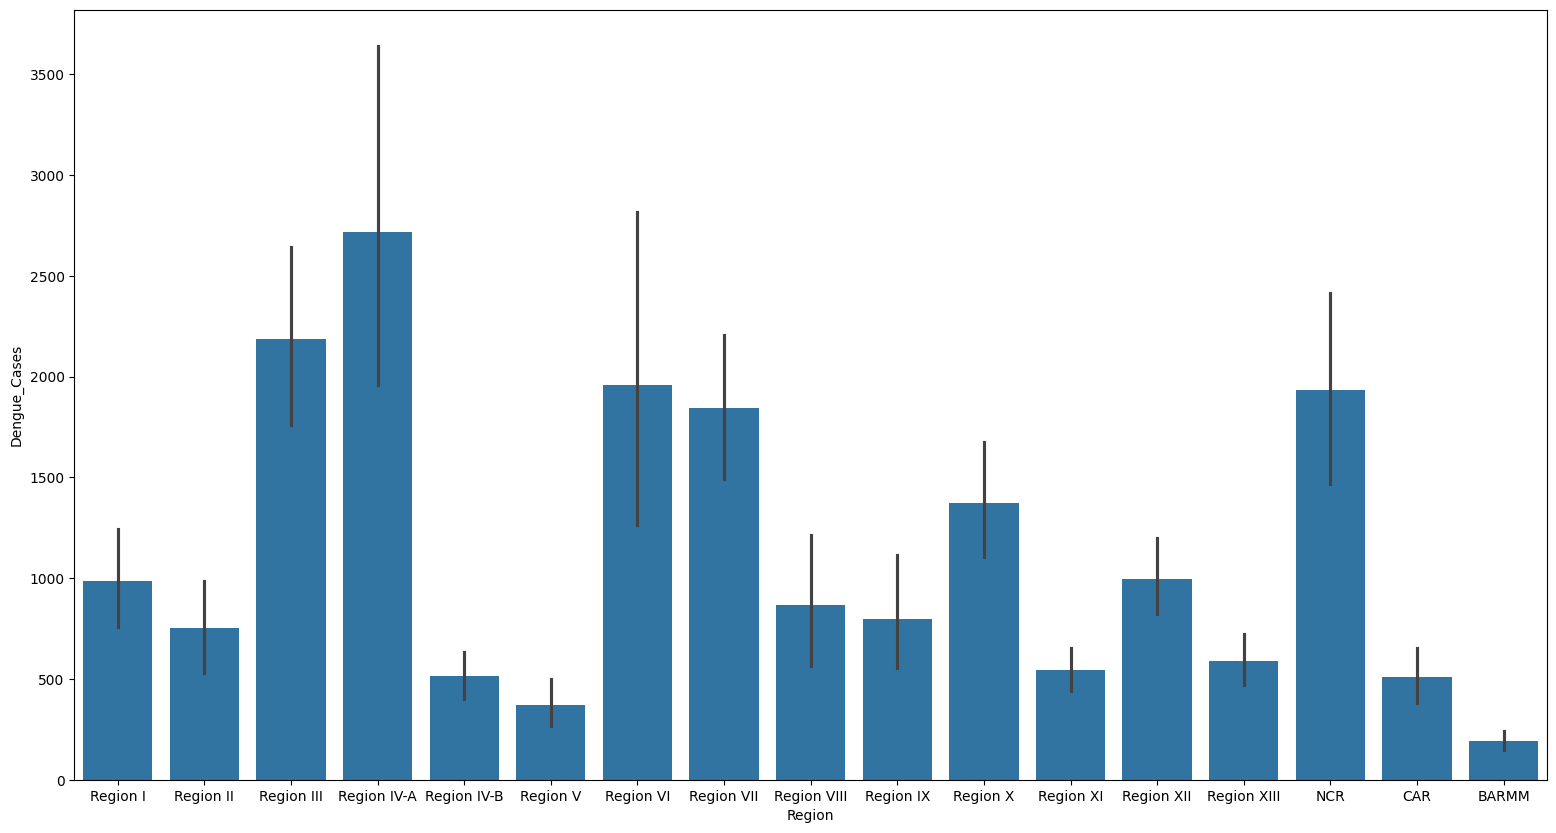

In [12]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [13]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [14]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [15]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [16]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


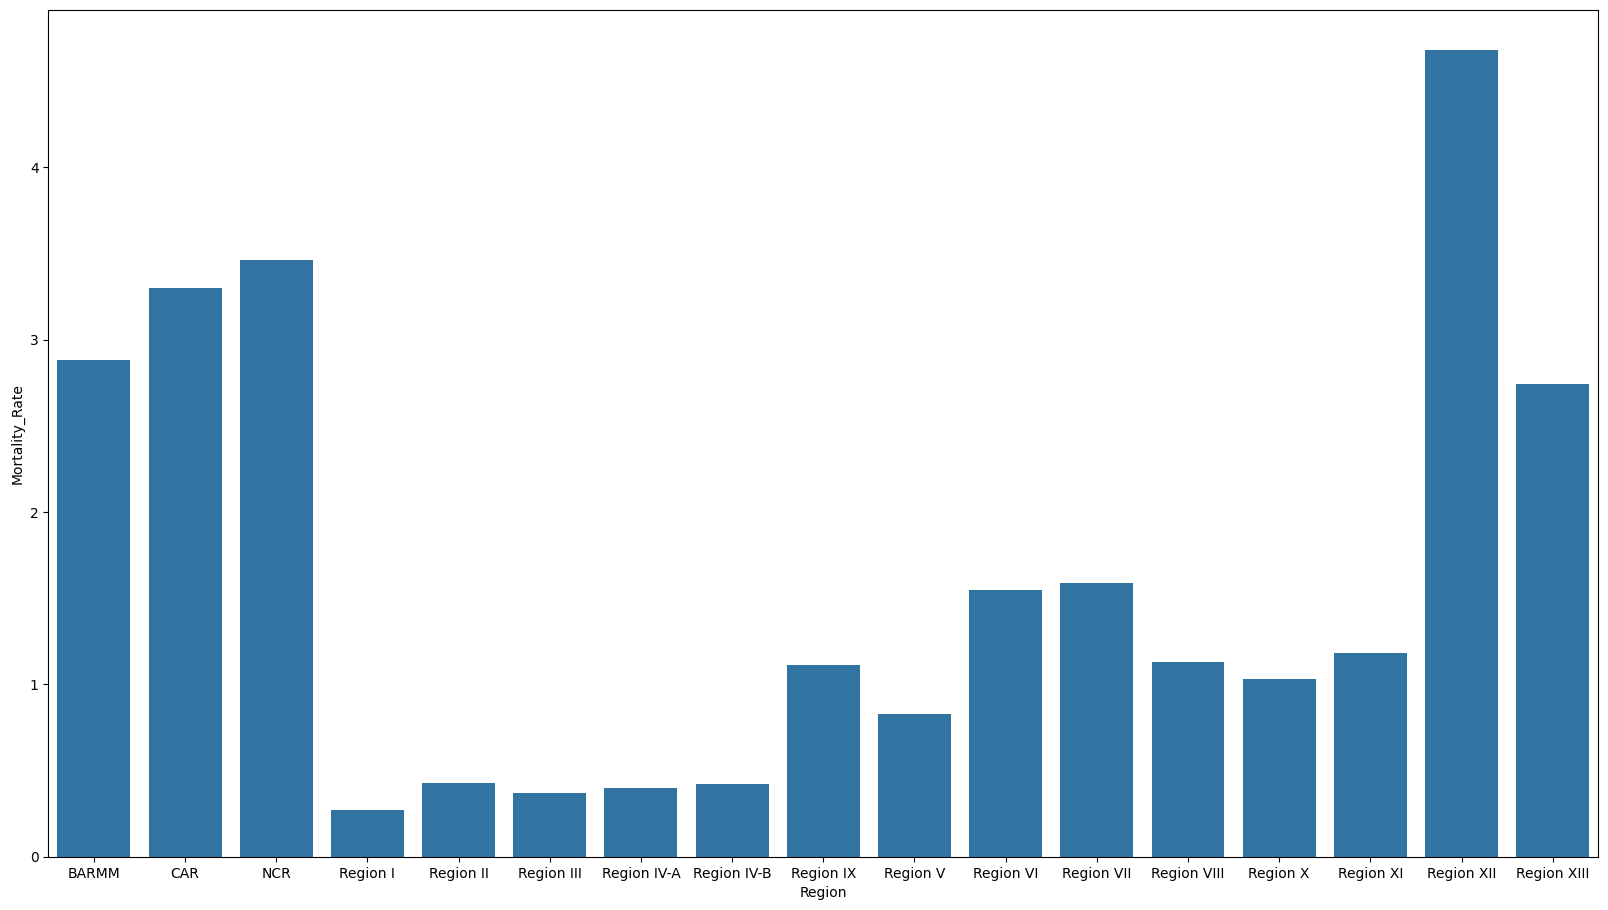

In [17]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

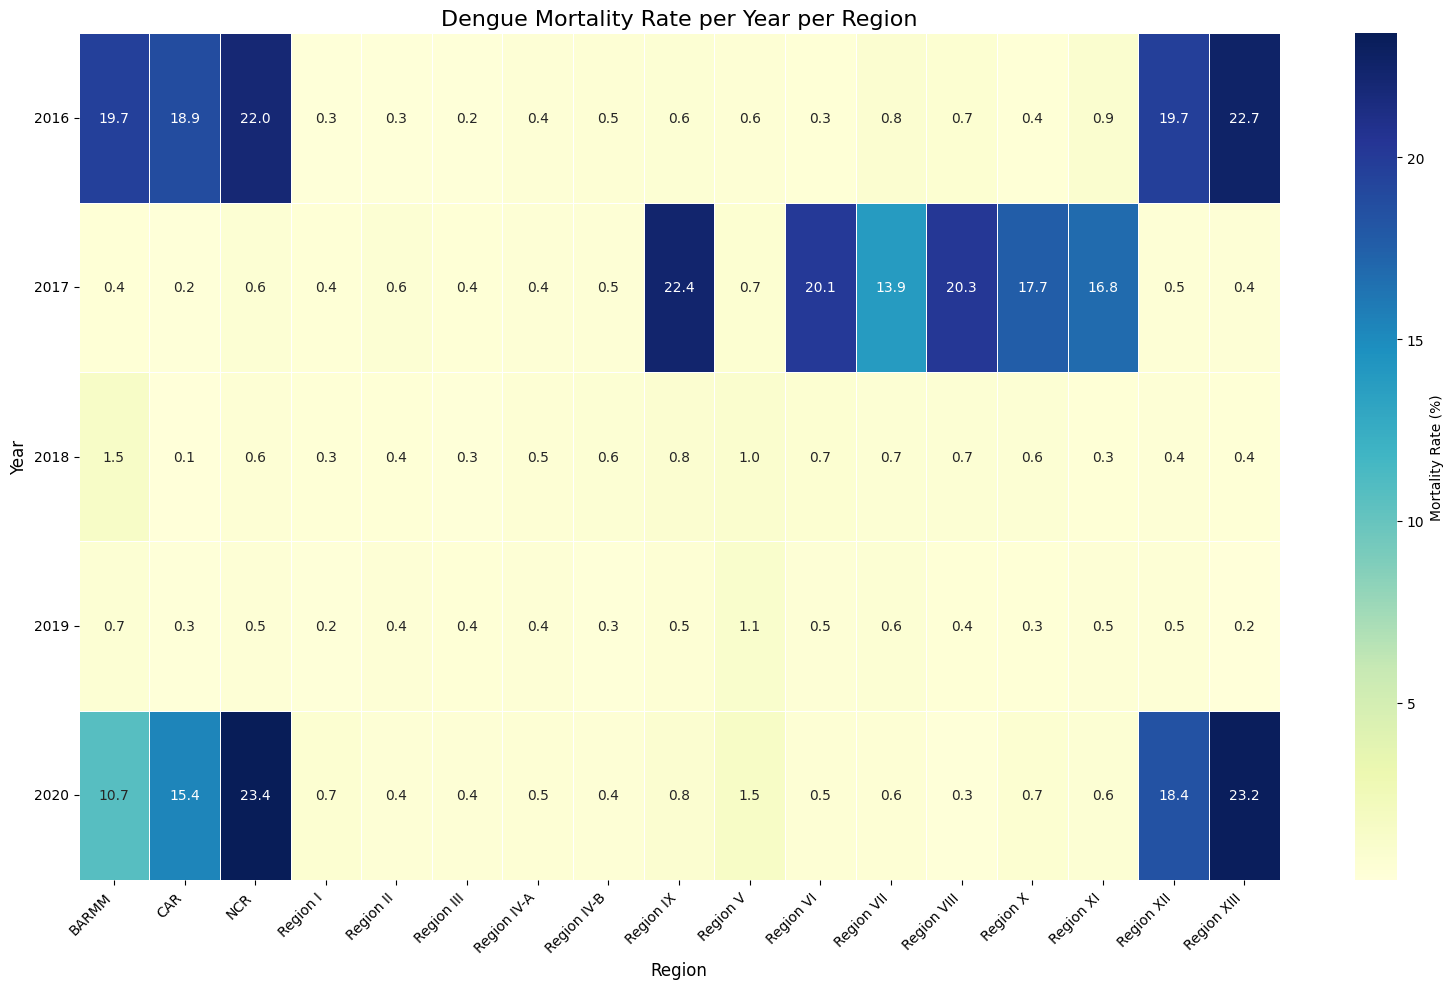

In [18]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1>PREDICTION USING LINEAR REGRESSION</h1>

<h2>What is the distribution of total Dengue cases across different years?</h2>

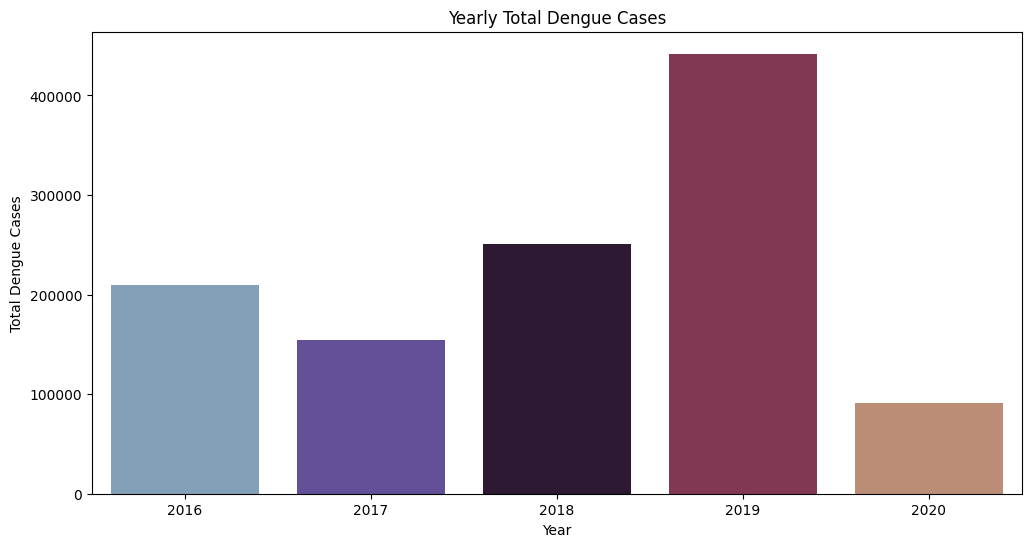

In [32]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Dengue_Cases', data=yearly_cases, palette='twilight')

plt.title("Yearly Total Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.show()

<h3>INSIGHT 1:</h3>
The bar graph shows that dengue cases change every year, meaning some years experience higher outbreaks than others. Some bars are much taller, which means certain years had a significantly higher number of dengue cases.

<h3>INSIGHT 2:</h3>
The differences between each year show how unpredictable dengue outbreaks can be. Years with higher bars may indicate seasons with heavier rainfall or poor mosquito control. If some years show a sudden spike, it suggests that dengue spread more quickly than usual.

<h3>INSIGHT 3:</h3>
Lower bars represent years where dengue cases were more controlled or where prevention was more effective.Comparing all the bars helps us identify which year had the worst dengue situation.This graph helps the government and health workers determine which years require more aggressive dengue prevention programs.

<h2>What is the trend of Dengue deaths across different years?</h2>

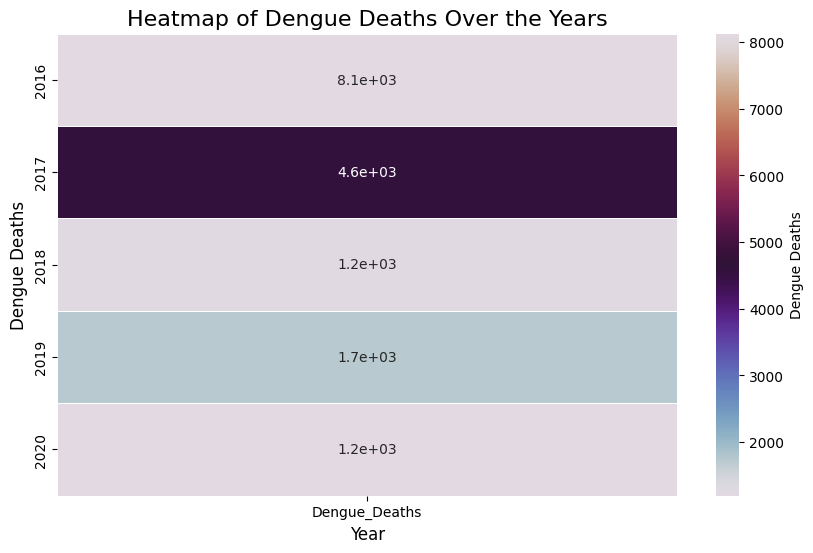

In [46]:
yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()

heatmap_data = yearly_deaths.set_index('Year')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='twilight', cbar_kws={'label': 'Dengue Deaths'}, linewidths=0.5)

plt.title("Heatmap of Dengue Deaths Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Dengue Deaths", fontsize=12)

plt.show()

<h3>INSIGHT 4:</h3>
The heatmap uses darker and lighter colors to show how many dengue deaths occurred each year. Darker colors mean more deaths, while lighter colors mean fewer deaths. This allows us to quickly see which years were more dangerous in terms of dengue fatalities.If one year is much darker, it could indicate a severe outbreak or late response to cases.

<h3>INSIGHT 5:</h3>
Some years may show lighter shades, meaning dengue deaths were more controlled or minimal.The heatmap makes it easy to compare different years at a glance without reading exact numbers.It helps identify patterns—like whether deaths rise or fall over time.This visualization helps health officials understand which years they need to review and improve dengue management.

<h2>What does the trend of Dengue deaths over the years reveal?</h2>

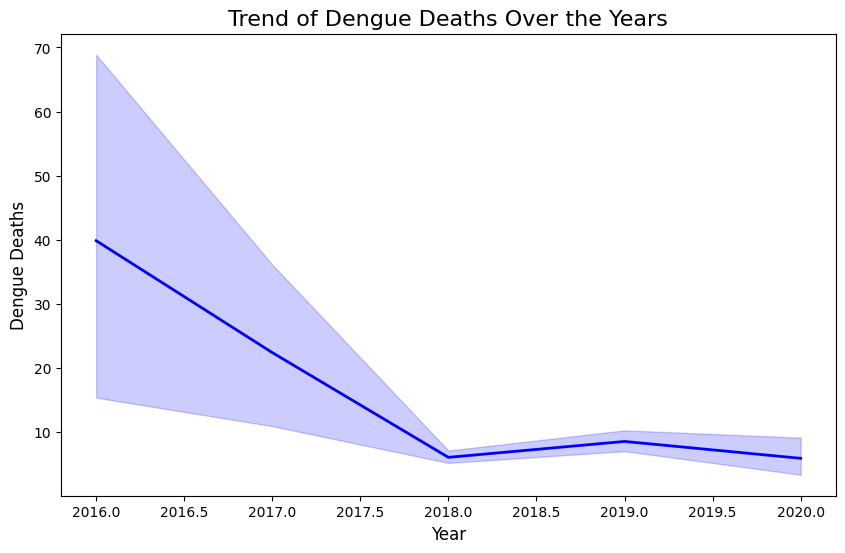

In [42]:
plt.figure(figsize=(10,6))

sns.lineplot(data=dengue, x='Year', y='Dengue_Deaths', color='blue', linewidth=2)

plt.title("Trend of Dengue Deaths Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Dengue Deaths", fontsize=12)

plt.show()

<h3>IJNSIGHT 6:</h3>
The line graph shows how dengue deaths increase or decrease from year to year. If the line goes upward, it means dengue deaths were rising that year. If the line drops downward, deaths decreased, which is a good sign. A sudden jump in the line may indicate an unexpected outbreak. A flat or slightly moving line means the number of deaths stayed steady.

<h3>INSIGHT 7:</h3>
This graph helps us understand if dengue is becoming more dangerous or more controlled over time.The smoothness of the line makes it easier to spot long-term trends.Public health workers can use this graph to identify years that need emergency planning or improved dengue prevention.

<h2>How have Dengue cases fluctuated in Region IV-A (CALABARZON) over the years?</h2>

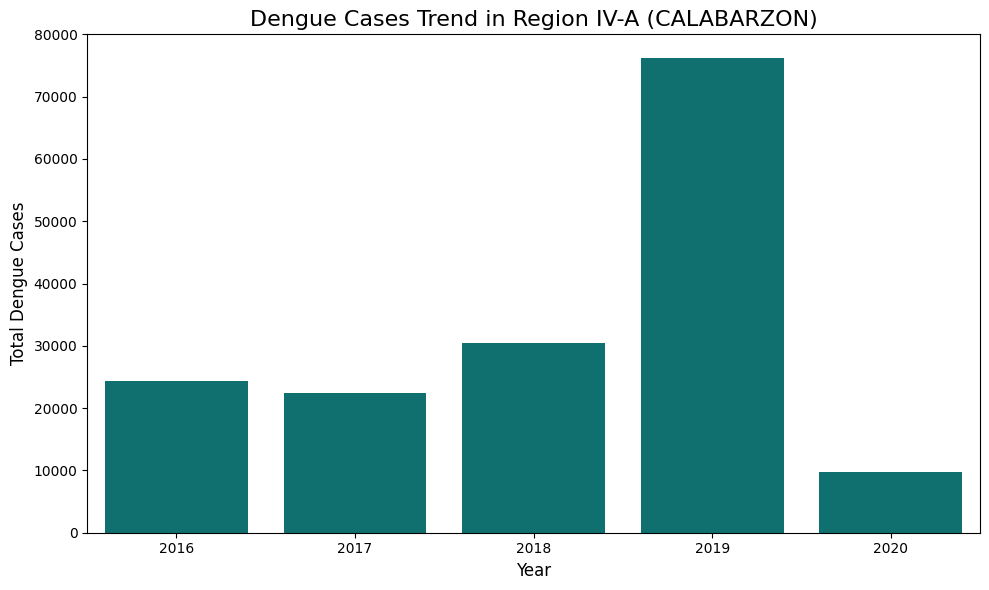

In [71]:
calabarzon = dengue[dengue['Region'] == 'Region IV-A']

yearly_cases_calabarzon = calabarzon.groupby('Year')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=yearly_cases_calabarzon, x='Year', y='Dengue_Cases', color='teal')

plt.title("Dengue Cases Trend in Region IV-A (CALABARZON)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Dengue Cases", fontsize=12)

plt.tight_layout()
plt.show()

<h3>INSIGHT 8:</h3>
This bar graph shows the total number of dengue cases recorded in Region IV-A for each year, allowing us to focus only on the situation in this specific region rather than the entire country. Years with taller bars indicate a spike in dengue cases, which means the region experienced stronger or more widespread outbreaks during those years.

<h3>INSIGHT 9:</h3>
Years with shorter bars show lower dengue cases, suggesting that dengue transmission was more controlled, and fewer people got infected.If the bars appear to increase gradually over several years, this may signal that dengue cases in Region IV-A are rising over time, which can be a warning for health officials.If the bars decrease across the years, it may mean that dengue prevention programs such as cleanup drives, fogging, and awareness campaigns were effective in reducing cases.

<h3>INSIGHT 10:</h3>
This visualization makes it easier to compare Region IV-A’s yearly trend with the national dengue trend, helping us see if the region follows the same pattern as the whole country or if it behaves differently.High-case years in Region IV-A could be linked to factors like strong rainfall, flooding, poor waste management, or population density, since these conditions help mosquitoes breed and spread dengue.Local government units (LGUs) in CALABARZON can use this graph to plan better health responses, such as preparing hospitals, strengthening mosquito control, and launching community awareness campaigns at the right time.